Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).
Нарисуйте график распределения показов на объявление за весь период.
Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

Here is the data of interactions with advertisements on a certain site for 6 days. And a table with the characteristics of advertising clients (those who posted these ads).

Data we have

ads_data.csv – ad interaction data

-date
-time 
-event – view/click
-platform
-ad_id 
-client_union_id – id of ad account
-campaign_union_id – id ad compaign
-ad_cost_type – payment type
-ad_cost – ad price
-has_video – status
-target_audience_count -audience value

ads_clients_data.csv – clients info

-date 
-client_union_id – id of ad account
-community_id – id of community
-create_date – ad client creation date


In [91]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

In [92]:
ads = pd.read_csv('/Users/alinarunaeva/Projects_Python/Advertasing_Clicks_and_CR/ads_data.csv') #read file

In [93]:
ads.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [94]:
ads.info() #show data type and df size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   date                   1000000 non-null  object 
 1   time                   1000000 non-null  object 
 2   event                  1000000 non-null  object 
 3   platform               1000000 non-null  object 
 4   ad_id                  1000000 non-null  int64  
 5   client_union_id        1000000 non-null  int64  
 6   campaign_union_id      1000000 non-null  int64  
 7   ad_cost_type           1000000 non-null  object 
 8   ad_cost                1000000 non-null  float64
 9   has_video              1000000 non-null  int64  
 10  target_audience_count  1000000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 83.9+ MB


In [95]:
#Date and time types in df should be changed

In [96]:
ads['date'] = pd.to_datetime(ads['date'])

# let's change date type to date

1. Let's work with ads info
Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

Calculate the average number of views and the average number of clicks on ads for the entire period (round up to integers).

In [97]:
events = ads.groupby(['ad_id','event'], as_index = False)\
.agg({"platform":"count"})\
.rename(columns = {"platform":"qty"})\
.pivot(index='ad_id', columns='event', values='qty').reset_index()\
.fillna(0)


#**Как сделать сводную таблицу?**
    
#Для создания сводной таблички вам нужен датафрэйм с 3-мя колонками - значения одной станут индексом, 
#значения другой - колонками, а значения третьей распределятся по получающейся табличке. 
#df.pivot(index='index_column', columns='columns_column', values='values_column')

#fillna(144)= заполняет пропуски

#**How to make a pivot table?**
    
#To create a pivot table you need a dataframe with 3 columns - the values ​​are available by one index,
#values - in columns, and the values ​​differ according to the resulting plate.
#df.pivot(index='index_column', columns='columns_column', values='values_column')


In [98]:
events #av. results of the period

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0
...,...,...,...
960,122004,4.0,100.0
961,122013,0.0,156.0
962,122023,0.0,68.0
963,122031,1.0,138.0


Отобразите распределения показов на объявление за весь период.

Show the distribution of views per ad for the entire period.

In [99]:
views = ads.query('event == "view"')\
.groupby(['ad_id'], as_index = False)\
.agg({"platform":"count"})\
.rename(columns = {"platform":"views"})

In [100]:
views['logg'] = np.log(views.views)# add new column with log values of views

In [101]:
views.head()

,ad_id,views,logg
0,2,101,4.615121
1,3,184,5.214936
2,1902,41,3.713572
3,2064,35,3.555348
4,2132,58,4.060443


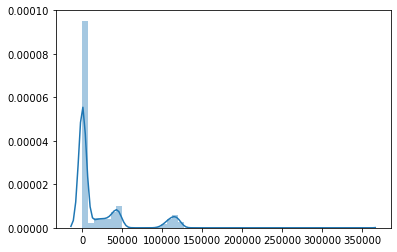

In [102]:
sns.distplot(views)

Нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). 
Посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года?

Let's calculate the moving average of impressions with a window of 2. What is the moving average value for April 6, 2019?

In [103]:
ad_view = ads.query('event == "view"')\
.pivot_table(index = 'ad_id', columns='date', values='platform', aggfunc = 'count')\
.round()
# create pivot table, where dates are columns


In [104]:
ad_view.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [105]:
ad_view_mean = ad_view.mean() 
ad_view_mean #arithmetic average result

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [106]:
rolling_daily = ad_view.mean().rolling(window = 2).mean().round() #rolling  average result by day

In [107]:
rolling_daily

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

In [108]:
rolling_daily['2019-04-06'] # result for the exact date

598.0

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).
Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.

The rolling average is often used to find anomalies in data. Let's try to plot on one graph the values of just the average number of impressions by day and the rolling average based on this data (which we received in the last task).
Let's try to plot the values of the arithmetic average by days and the rolling average of the number of views on one chart. On which day is the greatest difference in modulus between the arithmetic average and the rolling  average? Days in which the moving average is equal to NaN are not taken into account.

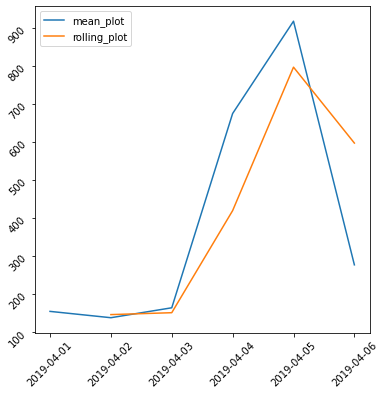

In [109]:
fig, ax = plt.subplots(figsize = (6,6))
sns.lineplot(data= ad_view_mean, ax = ax, label = 'mean_plot')
sns.lineplot(data= rolling_daily, ax = ax, label = 'rolling_plot')
ax.tick_params(rotation = 45)

2. Let's work with customers' events

In [110]:
clients = pd.read_csv('/Users/alinarunaeva/Projects_Python/Advertasing_Clicks_and_CR/ads_clients_data.csv')

In [111]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122078 entries, 0 to 122077
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   date             122078 non-null  object
 1   client_union_id  122078 non-null  int64 
 2   community_id     122078 non-null  int64 
 3   create_date      122078 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.7+ MB


In [112]:
clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [113]:
clients.client_union_id.nunique()

122078

In [114]:
ttl = ads.merge(clients, on = 'client_union_id' )

In [115]:
ttl.head(10)

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
5,2019-04-01,2019-04-01 00:16:59,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
6,2019-04-01,2019-04-01 00:21:54,view,web,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
7,2019-04-01,2019-04-01 00:29:58,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
8,2019-04-01,2019-04-01 00:32:10,view,web,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
9,2019-04-01,2019-04-01 00:33:07,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04


In [116]:
#df['DateTime'] = pd.to_datetime(df['DateTime'])
ttl['create_date'] = pd.to_datetime(ttl['create_date'])#change the data type to datetime
ttl['date_x'] = pd.to_datetime(ttl['date_x'])#change the data type to datetime

In [117]:
ttl['duration']=ttl['date_x'] - ttl['create_date']
#calculate the diff between the date of client account creation and ads. 
#Save result  to the new column 'duration'

In [118]:
ttl.shape

(1000000, 15)

In [119]:
ttl

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,duration
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days


In [120]:
first_ads = ttl.groupby('client_union_id').duration.min()# find min date- first date of ads

In [121]:
first_ads

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: duration, Length: 838, dtype: timedelta64[ns]

In [153]:
first_ads.mean() # find the average amount of days from account creation till ad

Timedelta('124 days 09:04:43.532219')

3. CR
Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Let's calculate the conversion from the creation of an advertising account to the launch of the first ad within no more than 365 days.

First,we have to select the customers whose first ads were launched no later than a year after registration.
Then count their number and divide by the number of all customers, convert to a percentage and round up to the 2nd decimal place.

In [184]:
df_first_ads = first_ads.to_frame() #create df from Series

In [185]:
df_first_ads

,duration
client_union_id,
1,98 days
9,114 days
13,66 days
16,105 days
20,32 days
...,...
122004,67 days
122013,151 days
122023,126 days


In [186]:
df_first_ads['duration'] = df_first_ads['duration'].dt.days #change timedelta type od column to int

In [189]:
df_first_ads.dtypes

duration    int64
dtype: object

In [190]:
within_year = df_first_ads.query('duration < 365') # select values less than 365

In [191]:
within_year

,duration
client_union_id,
1,98
9,114
13,66
16,105
20,32
...,...
122004,67
122013,151
122023,126


In [199]:
cr = (len(within_year['duration'])/clients['client_union_id'].nunique())*100 # CR calculation

In [200]:
cr

0.6864463703533806

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Let's devide our clients by intervals from the creation of an advertising account to the launch of the first advertisement.

Определим, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. 
Создать временные промежутки можно с помощью pd.to_timedelta().

Let's determine how many unique customers launched their first ad in the first month of their existence (from 0 to 30 days). The list of day intervals for the pd.cut() method is [0, 30, 90, 180, 365].
Time periods can be created using pd.to_timedelta().

In [206]:
bins = [0, 30, 90, 180, 365] #set the periods

In [207]:
labels = ('0-30','30-90', '90-180', '>365') @set the names of the periods

In [208]:
binned = pd.cut(df_first_ads['duration'], bins, labels = labels) #cut the values into periods

In [210]:
binned.value_counts() #calculate how many values are in each period

90-180    396
30-90     263
>365      168
0-30       11
Name: duration, dtype: int64